# Generalise this code so that you just need to enter the names of the inputs and output files, as well as the network architechture to make training faster.

In [0]:
input_data_fn = 'b2c_nonoise_50k_tsc_input_data.csv'
output_data_fn = 'b2c_nonoise_50k_tsc_output_data.csv'

data_path = '/content/gdrive/My Drive/Colab Notebooks/data/'


architecture = 0  # = ann, 1= mann
P = 256 #output pixels

output_network_name = 'b2c_nonoise_208_104_256';

In [0]:
print(data_path+input_data_fn)

/content/gdrive/My Drive/Colab Notebooks/data/b2c_nonoise_50k_tsc_inputdata.csv


In [0]:
from google.colab import drive
drive.mount('/content/gdrive')


Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
tf.logging.set_verbosity(tf.logging.ERROR)
import pandas as pd
import numpy as np
from keras.callbacks import EarlyStopping
from keras.callbacks import ModelCheckpoint
import io
import matplotlib.pyplot as plt

Using TensorFlow backend.


In [0]:
in_df = pd.read_csv(data_path+input_data_fn, delimiter=',', prefix="Trial", skiprows=0, header=None)
out_df = pd.read_csv(data_path+output_data_fn, delimiter=',', prefix="Trial", skiprows=0, header=None)

input_data = in_df.values
output_data = out_df.values



In [0]:
# Early Stopping

# mc1 = ModelCheckpoint('best_ann.h5', monitor='val_acc', mode= 'max', verbose=0, save_best_only = True)
mc = ModelCheckpoint('content/gdrive/My Drive/Colab Notebooks/networks/best_nonoise_208_10_256.h5',
                      monitor='val_acc', mode= 'max',
                      verbose=0, save_best_only = True)


# Training Model 1 (208,20, 576)



In [0]:
# Callbacks
es = EarlyStopping(monitor='loss', mode = 'min', verbose = 1, patience = 100)

# Architecture
l0 = tf.keras.layers.Dense(units=208, activation='relu', input_dim=208)  
l1 = tf.keras.layers.Dense(units=10, activation='relu')
l2 = tf.keras.layers.Dense(units=P, activation = 'linear')
model = tf.keras.Sequential([l0, l1, l2])
model.compile(loss='mean_squared_error',
              optimizer=tf.keras.optimizers.Adam(0.1) )

history = model.fit(input_data, output_data,
                    shuffle=True, 
                    validation_split = 0.15,
                    epochs=1000,
                    callbacks= [es, mc],
                    verbose=1 )

print('Completed Training')


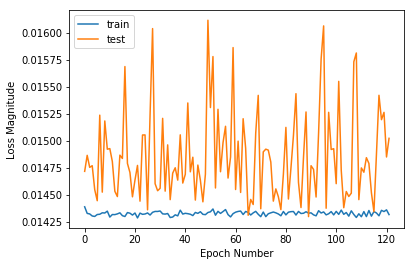

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.legend(['train', 'test'], loc = 'upper left')
plt.show()

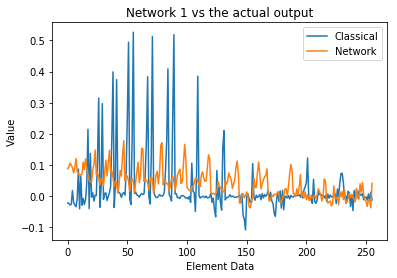

In [0]:
x = 5

eval_input = input_data[0:10, :]

net1_out = model.predict(eval_input)
actual_output = output_data[0:10, :]

plt.title('Network 1 vs the actual output')
plt.xlabel('Element Data')
plt.ylabel('Value')
plt.plot(actual_output[x,:])
plt.plot(net1_out[x,:])
plt.legend(['Classical', 'Network'], loc = 'upper right');

# Training Model 2 (208, 100, 576)

Another dense fully conected layer with one single hidden layer of 256 neaurons.

In [0]:
ml0 = tf.keras.layers.Dense(units=208, activation='elu', input_dim=208)  
ml1 = tf.keras.layers.Dense(units=100, activation='elu')
ml2 = tf.keras.layers.Dense(units=P)
model2 = tf.keras.Sequential([ml0, ml1, ml2])
model2.compile(loss='mean_squared_error', optimizer=tf.keras.optimizers.Adam(lr = 0.01))

history2 = model2.fit(input_data, output_data,
                      shuffle=True,
                      epochs=1000,
                      callbacks= [es],
                      verbose=0 )

print('Completed Training')

Epoch 00359: early stopping
Completed Training


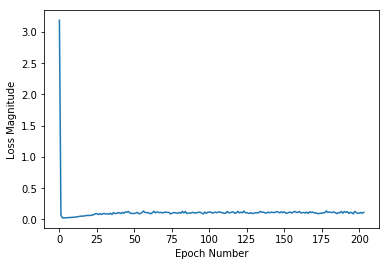

In [0]:
plt.xlabel('Epoch Number')
plt.ylabel("Loss Magnitude")
plt.plot(history2.history['loss'])

In [0]:
# Gonna try and see if I can predict some values


# The first row of input data
in_pred = np.array([input_data[0,0:208]])
# The corresponing classical output
actual_out = np.array([output_data[0,0:576]])
# The networks represenation of the input signal
ann_out = model.predict(in_pred)

#Print the output to a .csv file
# np.savetxt("in_pred.csv", in_pred, delimiter=",")
# np.savetxt("actual_out.csv", actual_out, delimiter=",")
# np.savetxt("ann_out.csv", ann_out, delimiter=",")

# pd.DataFrame(in_pred).to_csv("/content/gdrive/My Drive/Colab Notebooks/out/in_pred.csv")
# pd.DataFrame(actual_out).to_csv("/content/gdrive/My Drive/Colab Notebooks/out/actual_out.csv")
# pd.DataFrame(ann_out).to_csv("/content/gdrive/My Drive/Colab Notebooks/out/ann_out.csv")




# Evaluating the Data
Produce a network output for 10 of the inputs and then print the results to a matlab file, from which we can visualise the network's performance.

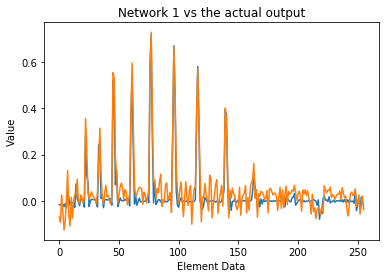

In [0]:
eval_input = input_data[0:10, :]

net1_out = model.predict(eval_input)
net2_out = model2.predict(eval_input)

actual_output = output_data[0:10, :]

plt.title('Network 1 vs the actual output')

x = 7
plt.xlabel('Element Data')
plt.ylabel('Value')
plt.plot(actual_output[x,:], label= 'NR Output')
# plt.plot(net1_out[x,:], label='ANN')
plt.plot(net2_out[x,:], label='ANN')